### Description:

In this notebook, we will compute the IOU for the Yolo nas default and predicted.......

In [ ]:
### run only once 

# pip install -q super-gradients==3.1.1
# pip install torchinfo
####

In [1]:
from iou_utils_NAS import *
import warnings
warnings.filterwarnings("ignore")


/Users/mautushid/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The console stream is logged into /Users/mautushid/sg_logs/console.log


[2023-05-16 06:29:02] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-05-16 06:29:04] WARNING - redirects.py - NOTE: Redirects are currently not supported in Windows or MacOs.
[2023-05-16 06:29:10] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-05-16 06:29:10] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-05-16 06:29:10] WARNING - export.py - Failed to import pytorch_quantization
[2023-05-16 06:29:10] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-05-16 06:29:10] WARNING - env_sanity_check.py - Failed to verify operating system: Deci officially supports only Linux kernels. Some features may not work as expected.


In [2]:
### Dataset Directory
data_directory = '/Users/mautushid/github/Yolo_Nas/cow_test-1'
dataset_params['data_dir'] = data_directory

In [3]:

### Loading ground truth data (bounding box information)
test_images = "/Users/mautushid/github/Yolo_Nas/cow_test-1/test/images"
test_labels = "/Users/mautushid/github/Yolo_Nas/cow_test-1/test/labels"

### defining prediction output directory 
#output_dir_default = "/Users/mautushid/github/Yolo_Nas/predicted_test/predicted_test_default"
#output_dir_fintuned = "/Users/mautushid/github/Yolo_Nas/predicted_test/predicted_test_finetuned"

### Load the model (default Yolo_Nas_L)
yolo_nas_l = models.get("yolo_nas_l", pretrained_weights="coco")

### Loading model (after fine-tuning)
model_path = '/Users/mautushid/github/Yolo_Nas/checkpoints/downloded_weights/ckpt_best.pth'
best_model = models.get('yolo_nas_l',num_classes=len(dataset_params['classes']),checkpoint_path=model_path)

[2023-05-16 06:29:11] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-05-16 06:29:12] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Yolo_Nas/checkpoints/downloded_weights/ckpt_best.pth EMA checkpoint.


In [5]:
### making predictions for default model
#predicted_image_list_default = show_predicted_images_from_dir(yolo_nas_l, test_images, conf = 0.6)

In [6]:
### making predictions for finetuned model
#predicted_image_list_finetuned = show_predicted_images_from_dir(best_model, test_images, conf = 0.60)

### Get bounding boxes of the predicted images

img_1


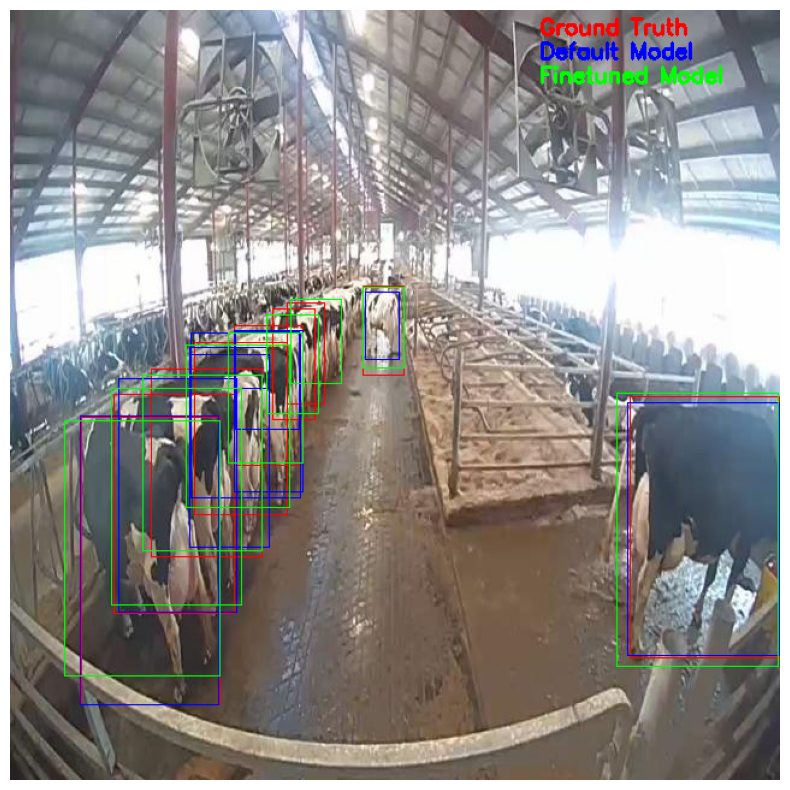

img_27


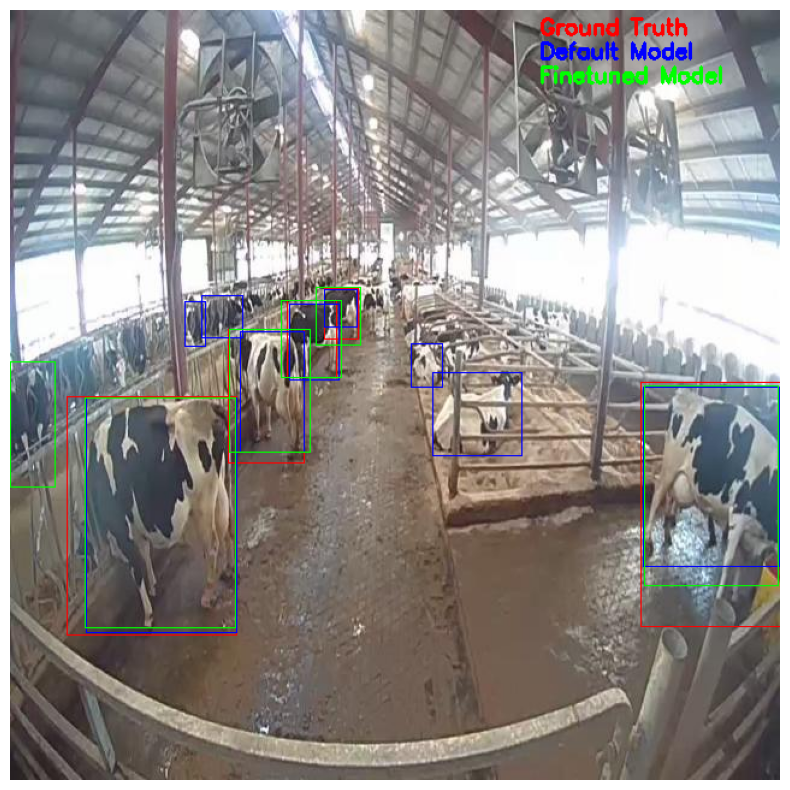

img_29


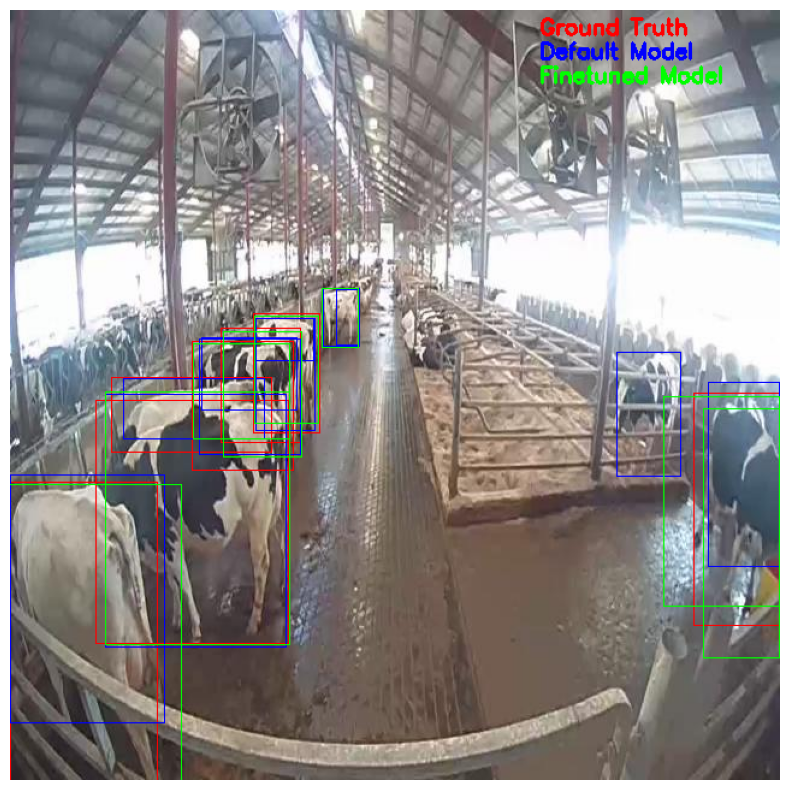

img_33


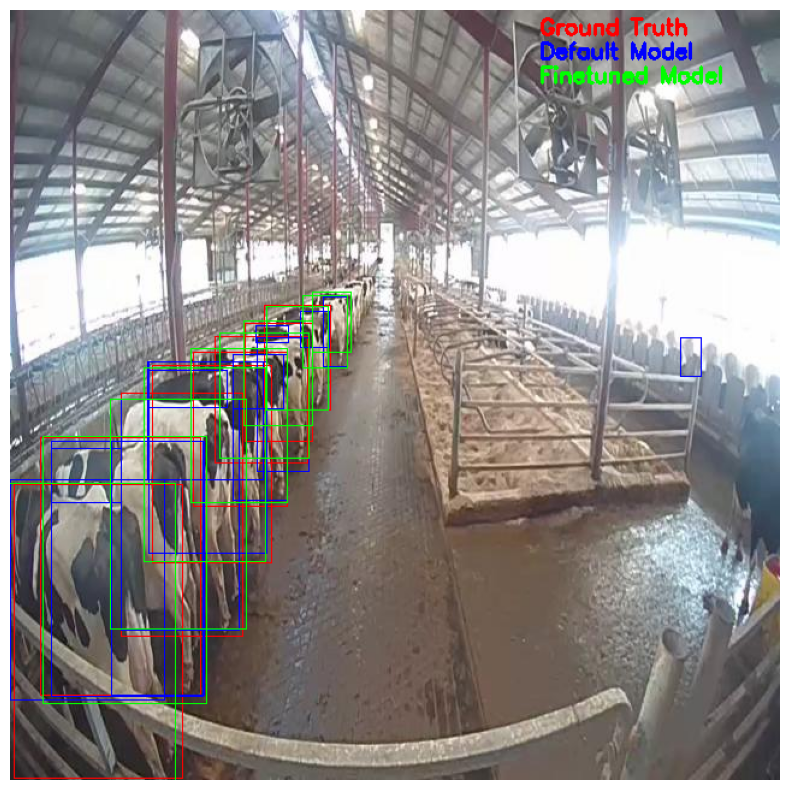

img_46


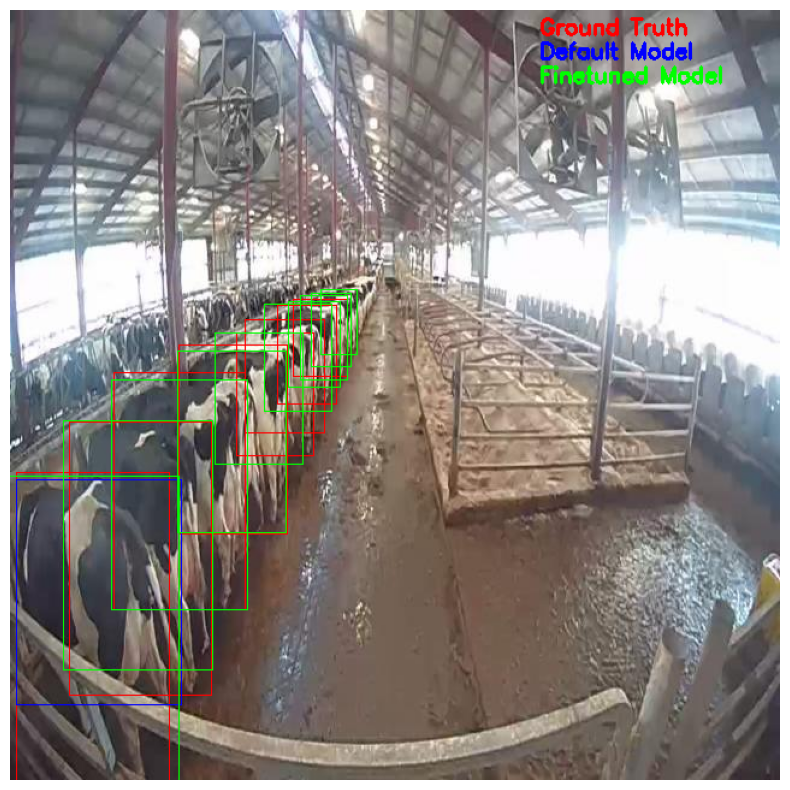

img_5


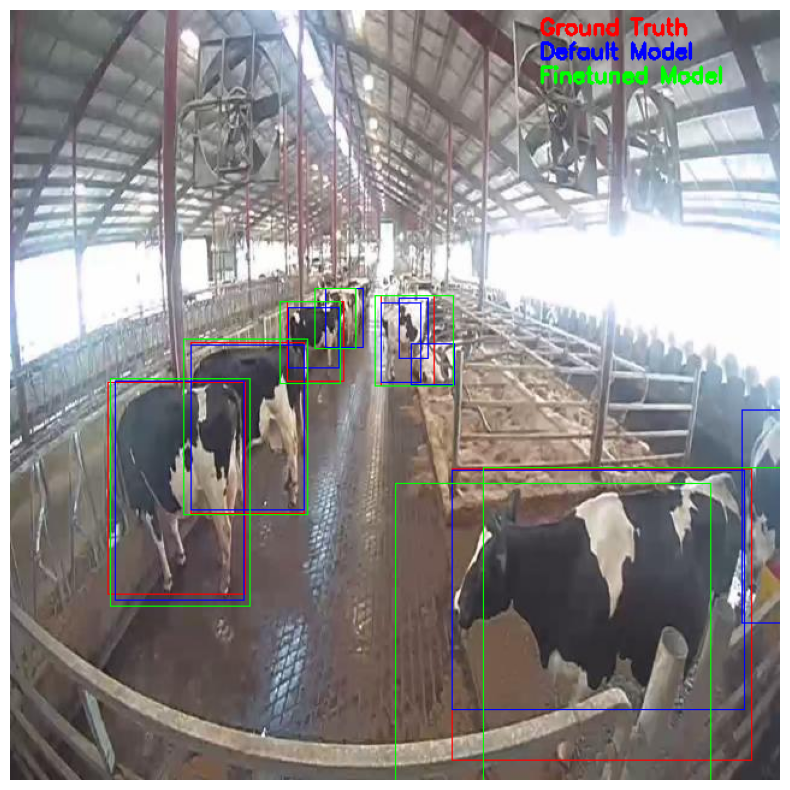

In [7]:
image_files = sorted(list(Path(test_images).rglob("*.jpg")))
label_files = sorted(list(Path(test_labels).rglob("*.txt")))
default_model = yolo_nas_l
finetuned_model = best_model 
iou_dicts = []
for i in range (len(image_files)):
    test_image_path = str(image_files[i])
    test_image_label = str(label_files[i])
    prediction_dict = get_boxex_for_all_models(test_image_path,test_image_label,default_model,finetuned_model, conf = 0.6)
    print(prediction_dict['image'])
    iou_dicts.append(compute_iou_for_all_models(prediction_dict))
    draw_boxes_all_models(test_image_path, prediction_dict)
    

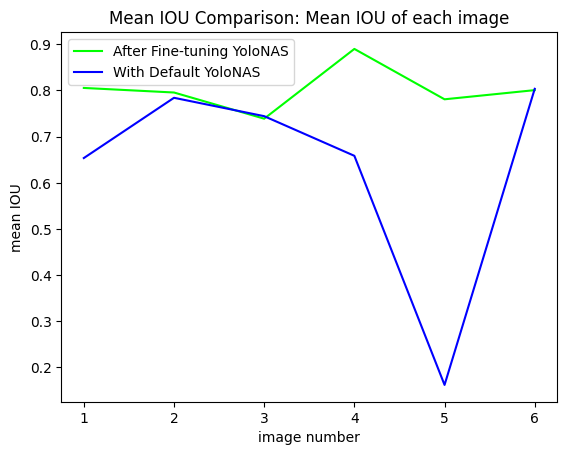

In [8]:
### Compute mean_IoU for both models for all images

x = list(range(1, len(iou_dicts)+1))
y1 = [np.mean(iou_dicts[i]['IOU_with_finetuned_YoloNAS'])for i in range(len(iou_dicts))]
y2 = [np.mean(iou_dicts[i]['IOU_with_default_YoloNAS']) for i in range(len(iou_dicts))]

# Plot the first dictionary in blue and the second in red
plt.plot(x, y1, color='lime', label='After Fine-tuning YoloNAS')
plt.plot(x, y2, color='blue', label='With Default YoloNAS')

# Add labels and title to the plot
plt.legend()

plt.xlabel('image number')
plt.ylabel('mean IOU')
plt.title('Mean IOU Comparison: Mean IOU of each image')
plt.xticks(range(1, len(iou_dicts) + 1))
# Show the plot
plt.show()
